In [1]:
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import datetime
import time
import talib
from talib import *
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np
import pickle
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
yf.pdr_override()

In [2]:
def add_indicators():
    
    
    
    upper_band, mid_band, lower_band = BBANDS(df['Adj Close'],timeperiod=slow, nbdevup=2, nbdevdn=2, matype=0)
    
    upper_band_nine, mid_band_nine, lower_band_nine = BBANDS(df['Adj Close'],timeperiod=fast,
                                                             nbdevup=1.645, nbdevdn=1.645, matype=0)
    
    upper_band_one, mid_band_one, lower_band_one = BBANDS(df['Adj Close'],timeperiod=really_fast,
                                                             nbdevup=1, nbdevdn=1, matype=0)
    
    upper_band_slow, mid_band_slow, lower_band_slow = BBANDS(df['Adj Close'],timeperiod=slow,
                                                             nbdevup=1.645, nbdevdn=1.645, matype=0)
    
    d_ema = DEMA(df['Adj Close'], timeperiod=really_fast)
    E_M_A = EMA(df['Adj Close'], timeperiod=fast)
    ht_trend = HT_TRENDLINE(df['Adj Close'])
    kama = KAMA(df['Adj Close'], timeperiod=fast)
    ma_fast = MA(df['Adj Close'], timeperiod=fast, matype=0)
    ma_really_fast = MA(df['Adj Close'], timeperiod=really_fast, matype=0)
    ma_slow = MA(df['Adj Close'], timeperiod=slow, matype=0)
    #mama, fama = MAMA(df['Adj Close'], fastlimit=really_fast, slowlimit=slow) < this gave me issues?
    #mavp = MAVP(df['Adj Close'])
    mid = MIDPOINT(df['Adj Close'], timeperiod=fast)
    mid_price = MIDPRICE(df['High'], df['Low'], timeperiod=fast)
    sar = SAR(df['High'], df['Low'], acceleration=.02, maximum=.2)
    sarext = SAREXT(df['High'], df['Low'], startvalue=0, offsetonreverse=0, accelerationinitlong=.02, accelerationlong=.02, accelerationmaxlong=.2, accelerationinitshort=.02, accelerationshort=.02, accelerationmaxshort=.2)
    sma = SMA(df['Adj Close'], timeperiod=slow)
    tema = TEMA(df['Adj Close'], timeperiod=slow)
    trima = TRIMA(df['Adj Close'], timeperiod=slow)
    wma = WMA(df['Adj Close'], timeperiod=slow)

    #this is some of the beginning stuff

    O_B_V = OBV(df['Adj Close'], df['Volume'])
    A_D_O_S_C = ADOSC(df['High'], df['Low'], df['Adj Close'], df['Volume'], fastperiod=fast, slowperiod=slow)
    O_G_chaikin = AD(df['High'], df['Low'], df['Adj Close'], df['Volume'])
    HT_DCper = HT_DCPERIOD(df['Adj Close'])
    HT_DCphase = HT_DCPHASE(df['Adj Close'])
    inphase, quad = HT_PHASOR(df['Adj Close'])
    r_sin, leadsin = HT_SINE(df['Adj Close'])

    #volatility
    atr = ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)
    natr = NATR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)
    t_range = TRANGE(df['High'], df['Low'], df['Adj Close'])

    #below here are momentum ind

    adx = ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    adxr = ADXR(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    apo = APO(df['Adj Close'], fastperiod=really_fast, slowperiod=fast, matype=0)
    aroon_d, aroon_u = AROON(df['High'], df['Low'], timeperiod=fast)
    aroon_osc = AROONOSC(df['High'], df['Low'], timeperiod=fast)
    bop = BOP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    cci = CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    cmo = CMO(df['Adj Close'], timeperiod=fast)
    dx = DX(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    macd, macdsig, macdhist = MACD(df['Adj Close'], fastperiod=fast, slowperiod=slow, signalperiod=really_fast)
    macdex, macdexsig, macdexhist = MACDEXT(df['Adj Close'], fastperiod=fast, fastmatype=0, slowperiod=slow, slowmatype=0, signalperiod=really_fast, signalmatype=0)
    macdfixd, macdfixdsig, macdfixdhist = MACDFIX(df['Adj Close'], signalperiod=really_fast)
    # more momo's

    mfi = MFI(df['High'], df['Low'], df['Adj Close'],df['Volume'],timeperiod=fast)
    min_di = MINUS_DI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    min_dm = MINUS_DM(df['High'], df['Low'], timeperiod=fast)
    momo = MOM(df['Adj Close'], timeperiod=really_fast)
    plus_di = PLUS_DI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    plus_dm = PLUS_DM(df['High'], df['Low'], timeperiod=fast)
    ppo = PPO(df['Adj Close'], fastperiod=really_fast, slowperiod=fast, matype=0)
    roc = ROC(df['Adj Close'], timeperiod=fast)
    rocp = ROCP(df['Adj Close'], timeperiod=fast)
    rocr = ROCR(df['Adj Close'], timeperiod=fast)
    rocr_hund = ROCR100(df['Adj Close'], timeperiod = fast)
    rsi_fastk, rsi_fastd = STOCHRSI(df['Adj Close'], timeperiod=fast, fastk_period=slow, fastd_period=really_fast, fastd_matype=0)
    trix = TRIX(df['Adj Close'], timeperiod=slow)
    ult_osc = ULTOSC(df['High'], df['Low'], df['Adj Close'], timeperiod1=really_fast, timeperiod2=fast, timeperiod3=slow)


    #old some of the first added
    R_S_I = RSI(df['Adj Close'], timeperiod=slow)
    slowk, slowd = STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, slowk_period=slow, slowk_matype=0, slowd_period=slow, slowd_matype=0)
    fastk, fastd = STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, fastd_period=really_fast, fastd_matype=0)

    real = WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)

    # below are the TA indicators

    two_crows = CDL2CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_crows = CDL3BLACKCROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_inside = CDL3INSIDE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_line = CDL3LINESTRIKE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_out = CDL3OUTSIDE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_stars = CDL3STARSINSOUTH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_soldier = CDL3WHITESOLDIERS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    baby = CDLABANDONEDBABY(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    adv = CDLADVANCEBLOCK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    belt_hold = CDLBELTHOLD(df['Open'], df['High'], df['Low'], df['Adj Close'])
    breakaway = CDLBREAKAWAY(df['Open'], df['High'], df['Low'], df['Adj Close'])
    closingmara = CDLCLOSINGMARUBOZU(df['Open'], df['High'], df['Low'], df['Adj Close'])
    baby_swallow = CDLCONCEALBABYSWALL(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    counter = CDLCOUNTERATTACK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    dark_cloud = CDLDARKCLOUDCOVER(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    doji = CDLDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    doji_star = CDLDOJISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    dragon_doji = CDLDRAGONFLYDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    engulf = CDLENGULFING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    evening_star = CDLEVENINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    gapside = CDLGAPSIDESIDEWHITE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    gravestone = CDLGRAVESTONEDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hammer = CDLHAMMER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hang_man = CDLHANGINGMAN(df['Open'], df['High'], df['Low'], df['Adj Close'])
    harami = CDLHARAMI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    harami_cross = CDLHARAMICROSS(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    high_wave = CDLHIGHWAVE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hikkake = CDLHIKKAKE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hikkake_mod = CDLHIKKAKEMOD(df['Open'], df['High'], df['Low'], df['Adj Close'])
    pidgeon = CDLHOMINGPIGEON(df['Open'], df['High'], df['Low'], df['Adj Close'])
    id_three_crows = CDLIDENTICAL3CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    in_neck = CDLINNECK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    inv_hammer = CDLINVERTEDHAMMER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    kicking = CDLKICKING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    kicking_len = CDLKICKINGBYLENGTH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    ladder_bot = CDLLADDERBOTTOM(df['Open'], df['High'], df['Low'], df['Adj Close'])
    doji_long = CDLLONGLEGGEDDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    long_line = CDLLONGLINE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    marabozu = CDLMARUBOZU(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    match_glow = CDLMATCHINGLOW(df['Open'], df['High'], df['Low'], df['Adj Close'])
    mat_hold = CDLMATHOLD(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    morning_doji = CDLMORNINGDOJISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    morning_star = CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    on_neck = CDLONNECK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    pierce = CDLPIERCING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    rickshaw = CDLRICKSHAWMAN(df['Open'], df['High'], df['Low'], df['Adj Close'])
    rise_fall = CDLRISEFALL3METHODS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    sep_line = CDLSEPARATINGLINES(df['Open'], df['High'], df['Low'], df['Adj Close'])
    shooting_star = CDLSHOOTINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    sl_candle = CDLSHORTLINE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    spin_top = CDLSPINNINGTOP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    stalled = CDLSTALLEDPATTERN(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    stick_sand = CDLSTICKSANDWICH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    takuri = CDLTAKURI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    tasuki_gap = CDLTASUKIGAP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    thrust = CDLTHRUSTING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    tristar = CDLTRISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_river = CDLUNIQUE3RIVER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    ud_two_gap = CDLUPSIDEGAP2CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    down_three_gap = CDLXSIDEGAP3METHODS(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #76 vars

    #are_all_zero = (test_TA == 0).all()
    #true if all values are 0
    #false if contain a non 0'''

    #df.drop(['Close'], axis =1, inplace = True)

    df['upper_band'] = upper_band
    df['lower_band'] = lower_band
    df['mid_band'] = mid_band
    
    df['upper_band_nine'] = upper_band_nine
    df['lower_band_nine'] = lower_band_nine
    df['mid_band_nine'] = mid_band_nine
    
    df['upper_band_one'] = upper_band_one
    df['lower_band_one'] = lower_band_one
    df['mid_band_one'] = mid_band_one
    
    df['upper_band_slow'] = upper_band_slow
    df['lower_band_slow'] = lower_band_slow
    df['mid_band_slow'] = mid_band_slow
    
    df['d_ema'] = d_ema
    df['ht_trend'] = ht_trend
    df['kama'] = kama
    df['ma_fast'] = ma_fast
    df['ma_really_fast'] = ma_really_fast
    df['ma_slow'] = ma_slow
    #df['mama'] = mama
    df['mid'] = mid
    df['mid_price'] = mid_price

    df['sar'] = sar
    df['sarext'] = sarext
    df['sma'] = sma
    df['tema'] = tema
    df['trima'] = trima
    df['wma'] = wma
    #df['fama'] = fama

    df['EMA'] = E_M_A
    df['SlowK'] = slowk
    df['SlowD'] = slowd
    df['R_S_I'] = R_S_I
    df['FastK'] = fastk
    df['FastD'] = fastd
    df['WilliamsR'] = real

    df['atr'] = atr
    df['natr'] = natr
    df['t_range'] = t_range


    #df['na_tr'] = natr

    df['OBV'] = O_B_V
    df['ADOSC'] = A_D_O_S_C
    df['ogchaikin'] = O_G_chaikin
    df['HTDCperiod'] = HT_DCper
    df['HTDCphase'] = HT_DCphase
    df['inphase'] = inphase
    df['quad'] = quad
    df['rsin'] = r_sin
    df['leadsin'] = leadsin

    df['mfi'] = mfi
    df['min_di'] = min_di
    df['min_dm'] = min_dm
    df['momo'] = momo
    df['plus_di'] = plus_di
    df['plus_dm'] = plus_dm
    df['ppo'] = ppo
    df['roc'] = roc
    df['rocp'] = rocp

    df['rocr'] = rocr
    df['rocr_hund'] = rocr_hund
    df['rsi_fastk'] = rsi_fastk
    df['rsi_fastd'] = rsi_fastd
    df['trix'] = trix
    df['ult_osc'] = ult_osc

    df['adx'] = adx
    df['adxr'] = adxr
    df['apo'] = apo
    df['aroon_d'] = aroon_d
    df['aroon_u'] = aroon_u
    df['aroon_osc'] = aroon_osc
    df['bop'] = bop
    df['cci'] = cci
    df['cmo'] = cmo

    df['dx'] = dx
    df['macd'] = macd
    df['macdsig'] = macdsig
    df['macdhist'] = macdhist
    df['macdex'] = macdex
    df['macdexsig'] = macdexsig
    df['macdexhist'] = macdexhist
    df['macdfixd'] = macdfixd
    df['macdfixdsig'] = macdfixdsig
    df['macdfixdhist'] = macdfixdhist

    df['two_crows'] = two_crows
    df['three_crows'] = three_crows
    df['three_inside'] = three_inside
    df['three_line'] = three_line
    df['three_out'] = three_out
    df['three_stars'] = three_stars
    df['three_soldier'] = three_soldier
    df['baby'] = baby
    df['adv'] = adv
    df['belt_hold'] = belt_hold
    df['breakaway'] = breakaway
    df['closingmara'] = closingmara
    df['baby_swallow'] = belt_hold

    df['counter'] = counter
    df['dark_cloud'] = dark_cloud
    df['doji'] = doji
    df['doji_star'] = doji_star
    df['dragon_doji'] = dragon_doji
    df['engulf'] = engulf
    df['evening_star'] = evening_star
    df['gapside'] = gapside
    df['gravestone'] = gravestone
    df['hammer'] = hammer
    df['hang_man'] = hang_man
    df['harami'] = harami
    df['harami_cross'] = harami_cross

    df['high_wave'] = high_wave
    df['hikkake'] = hikkake
    df['hikkake_mod'] = hikkake_mod
    df['pidgeon'] = pidgeon
    df['id_three_crows'] = id_three_crows
    df['in_neck'] = in_neck
    df['inv_hammer'] = inv_hammer
    df['kicking'] = kicking
    df['kicking_len'] = kicking_len
    df['ladder_bot'] = ladder_bot
    df['doji_long'] = doji_long
    df['long_line'] = long_line
    df['marabozu'] = marabozu
                                                    # this is  a comment
    df['match_glow'] = match_glow
    df['mat_hold'] = mat_hold
    df['morning_doji'] = morning_doji
    df['morning_star'] = morning_star
    df['on_neck'] = on_neck
    df['pierce'] = pierce
    df['rickshaw'] = rickshaw
    df['rise_fall'] = rise_fall
    df['sep_line'] = sep_line
    df['shooting_star'] = shooting_star
    df['sl_candle'] = sl_candle
    df['spin_top'] = spin_top
    df['stalled'] = stalled

    df['stick_sand'] = stick_sand
    df['takuri'] = takuri
    df['tasuki_gap'] = tasuki_gap
    df['thrust'] = thrust
    df['tristar'] = tristar
    df['three_river'] = three_river
    df['ud_two_gap'] = ud_two_gap
    df['down_three_gap'] = down_three_gap

In [3]:
def add_lag(num_lag_cols, this_df):
    
    tic = time.perf_counter()
    
    lag_cols = ['ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc','adj_close',
                'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line',
                'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star','dragon_doji',
                'engulf','evening_star','gapside','gravestone','hammer',
                'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows',
                'in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star','on_neck',
                'pierce','rickshaw','rise_fall','sep_line','shooting_star',
                'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar','three_river',
                'ud_two_gap','down_three_gap', 'upper_band','lower_band',
                'mid_band','d_ema','ht_trend','kama','ma_fast','ma_really_fast','ma_slow','mid','mid_price','sar',
                'sarext','sma','tema','trima','wma',
                'adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd',
                'macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix',
                'ult_osc', 'atr','natr','t_range',
                'upper_band_nine','lower_band_nine','mid_band_nine','upper_band_one','lower_band_one','mid_band_one',
                'upper_band_slow','lower_band_slow','mid_band_slow'
                ]

    shift_range = [x+1 for x in range(num_lag_cols)]

    for shift in shift_range:
        train_shift = this_df[merging_keys + lag_cols].copy()

        # E.g. order_day of 0 becomes 1, for shift = 1.
        # So when this is merged with order_day of 1 in df, this will represent lag of 1.
        train_shift['order_day'] = train_shift['order_day'] + shift

        foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
        train_shift = train_shift.rename(columns=foo)

        this_df = pd.merge(this_df, train_shift, on=merging_keys, how='left') #.fillna(0)

    del train_shift
    
    toc = time.perf_counter()

    tic_toc = (toc - tic) / 60

    print(f"completed lagging in {tic_toc:0.4f} min")
    

    return this_df

In [4]:
def add_labels(df, window_size):
    
    tic = time.perf_counter()
    
    print(window_size)
    
    df.loc[df['adj_close'] >= df['adj_close'].rolling(window_size, center = True).quantile(.9, interpolation='linear'), 'labels'] = 0 # sell
    
    df.loc[df['adj_close'] <= df['adj_close'].rolling(window_size, center = True).quantile(.1, interpolation='linear'), 'labels'] = 1 #buy
    
    df['labels'].fillna(2, inplace = True)
    
    
    toc = time.perf_counter()

    tic_toc = (toc - tic) / 60
    
    #BUY => 1, SELL => 0, HOLD => 2

    print(f"completed labels in {tic_toc:0.4f} min")
    
    #return list_test_labels

In [5]:
def add_scale(num_interval_lag):

    cols_to_scale = ['adj_close','ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl',
                     'range_oc', 'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                    'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line',
                     'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                    'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star',
                     'dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                    'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows',
                     'in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                    'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star',
                     'on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                    'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar',
                     'three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                    'mid_band','d_ema','ht_trend','kama','ma_fast','ma_really_fast','ma_slow','mid','mid_price',
                     'sar','sarext','sma','tema',
                     'trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                    'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist',
                     'macdfixd','macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                    'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd',
                     'trix','ult_osc', 'atr','natr','t_range',
                    'upper_band_nine','lower_band_nine','mid_band_nine','upper_band_one','lower_band_one',
                     'mid_band_one','upper_band_slow','lower_band_slow','mid_band_slow' 
                    ]

    for i in range(1,num_interval_lag+1):
        cols_to_scale.append("ema_lag_"+str(i))
        cols_to_scale.append("slowk_lag_"+str(i))
        cols_to_scale.append("slowd_lag_"+str(i))
        cols_to_scale.append("r_s_i_lag_"+str(i))
        cols_to_scale.append("fastk_lag_"+str(i))
        cols_to_scale.append("fastd_lag_"+str(i))
        cols_to_scale.append("williamsr_lag_"+str(i))
        cols_to_scale.append("volume_lag_"+str(i))
        cols_to_scale.append("range_hl_lag_"+str(i))
        cols_to_scale.append("range_oc_lag_"+str(i))
        cols_to_scale.append("adj_close_lag_"+str(i))

        cols_to_scale.append("upper_band_lag_"+str(i))
        cols_to_scale.append("lower_band_lag_"+str(i))
        cols_to_scale.append("mid_band_lag_"+str(i))
        
        cols_to_scale.append("upper_band_nine_lag_"+str(i))
        cols_to_scale.append("lower_band_nine_lag_"+str(i))
        cols_to_scale.append("mid_band_nine_lag_"+str(i))
        
        cols_to_scale.append("upper_band_one_lag_"+str(i))
        cols_to_scale.append("lower_band_one_lag_"+str(i))
        cols_to_scale.append("mid_band_one_lag_"+str(i))
        
        cols_to_scale.append("upper_band_slow_lag_"+str(i))
        cols_to_scale.append("lower_band_slow_lag_"+str(i))
        cols_to_scale.append("mid_band_slow_lag_"+str(i))
        
        cols_to_scale.append("d_ema_lag_"+str(i))
        cols_to_scale.append("ht_trend_lag_"+str(i))
        cols_to_scale.append("kama_lag_"+str(i))
        cols_to_scale.append("ma_fast_lag_"+str(i))
        cols_to_scale.append("ma_really_fast_lag_"+str(i))
        cols_to_scale.append("ma_slow_lag_"+str(i))
        cols_to_scale.append("mid_lag_"+str(i))
        cols_to_scale.append("mid_price_lag_"+str(i))
        cols_to_scale.append("sar_lag_"+str(i))
        cols_to_scale.append("sarext_lag_"+str(i))
        cols_to_scale.append("sma_lag_"+str(i))
        cols_to_scale.append("tema_lag_"+str(i))
        cols_to_scale.append("trima_lag_"+str(i))
        cols_to_scale.append("wma_lag_"+str(i))

        cols_to_scale.append("atr_lag_"+str(i))
        cols_to_scale.append("natr_lag_"+str(i))
        cols_to_scale.append("t_range_lag_"+str(i))

        #momentum indicator lag cols

        cols_to_scale.append("adx_lag_"+str(i))
        cols_to_scale.append("adxr_lag_"+str(i))
        cols_to_scale.append("apo_lag_"+str(i))
        cols_to_scale.append("aroon_d_lag_"+str(i))
        cols_to_scale.append("aroon_u_lag_"+str(i))
        cols_to_scale.append("aroon_osc_lag_"+str(i))
        cols_to_scale.append("bop_lag_"+str(i))
        cols_to_scale.append("cci_lag_"+str(i))
        cols_to_scale.append("cmo_lag_"+str(i))
        cols_to_scale.append("dx_lag_"+str(i))
        cols_to_scale.append("macd_lag_"+str(i))
        cols_to_scale.append("macdsig_lag_"+str(i))
        cols_to_scale.append("macdhist_lag_"+str(i))
        cols_to_scale.append("macdex_lag_"+str(i))

        cols_to_scale.append("mfi_lag_"+str(i))
        cols_to_scale.append("min_di_lag_"+str(i))
        cols_to_scale.append("min_dm_lag_"+str(i))
        cols_to_scale.append("momo_lag_"+str(i))
        cols_to_scale.append("plus_di_lag_"+str(i))
        cols_to_scale.append("plus_dm_lag_"+str(i))
        cols_to_scale.append("ppo_lag_"+str(i))
        cols_to_scale.append("roc_lag_"+str(i))
        cols_to_scale.append("rocp_lag_"+str(i))
        cols_to_scale.append("rocr_lag_"+str(i))
        cols_to_scale.append("rocr_hund_lag_"+str(i))
        cols_to_scale.append("rsi_fastk_lag_"+str(i))
        cols_to_scale.append("rsi_fastd_lag_"+str(i))
        cols_to_scale.append("trix_lag_"+str(i))
        cols_to_scale.append("ult_osc_lag_"+str(i))

        cols_to_scale.append("macdexsig_lag_"+str(i))
        cols_to_scale.append("macdexhist_lag_"+str(i))
        cols_to_scale.append("macdfixd_lag_"+str(i))
        cols_to_scale.append("macdfixdsig_lag_"+str(i))
        cols_to_scale.append("macdfixdhist_lag_"+str(i))


        #cols_to_scale.append("mama_lag_"+str(i))
        #cols_to_scale.append("NATR_lag_"+str(i))

        cols_to_scale.append("obv_lag_" +str(i))
        cols_to_scale.append("adosc_lag_"+str(i))
        cols_to_scale.append("ogchaikin_lag_"+str(i))
        cols_to_scale.append("htdcperiod_lag_"+str(i))
        cols_to_scale.append("htdcphase_lag_"+str(i))
        cols_to_scale.append("inphase_lag_"+str(i))
        cols_to_scale.append("quad_lag_"+str(i))
        cols_to_scale.append("rsin_lag_"+str(i))
        cols_to_scale.append("leadsin_lag_"+str(i))
        #cols_to_scale.append("fama_lag_"+str(i))

        cols_to_scale.append("two_crows_lag_" +str(i))
        cols_to_scale.append("three_crows_lag_"+str(i))
        cols_to_scale.append("three_inside_lag_"+str(i))
        cols_to_scale.append("three_line_lag_"+str(i))
        cols_to_scale.append("three_out_lag_"+str(i))
        cols_to_scale.append("three_stars_lag_"+str(i))
        cols_to_scale.append("three_soldier_lag_"+str(i))
        cols_to_scale.append("baby_lag_"+str(i))
        cols_to_scale.append("adv_lag_"+str(i))
        cols_to_scale.append("belt_hold_lag_"+str(i))
        cols_to_scale.append("breakaway_lag_"+str(i))
        cols_to_scale.append("closingmara_lag_"+str(i))
        cols_to_scale.append("baby_swallow_lag_"+str(i))

        cols_to_scale.append("counter_lag_" +str(i))
        cols_to_scale.append("dark_cloud_lag_"+str(i))
        cols_to_scale.append("doji_lag_"+str(i))
        cols_to_scale.append("doji_star_lag_"+str(i))
        cols_to_scale.append("dragon_doji_lag_"+str(i))
        cols_to_scale.append("engulf_lag_"+str(i))
        cols_to_scale.append("evening_star_lag_"+str(i))
        cols_to_scale.append("gapside_lag_"+str(i))
        cols_to_scale.append("gravestone_lag_"+str(i))
        cols_to_scale.append("hammer_lag_"+str(i))
        cols_to_scale.append("hang_man_lag_"+str(i))
        cols_to_scale.append("harami_lag_"+str(i))
        cols_to_scale.append("harami_cross_lag_"+str(i))

        cols_to_scale.append("high_wave_lag_" +str(i))
        cols_to_scale.append("hikkake_lag_"+str(i))
        cols_to_scale.append("hikkake_mod_lag_"+str(i))
        cols_to_scale.append("pidgeon_lag_"+str(i))
        cols_to_scale.append("id_three_crows_lag_"+str(i))
        cols_to_scale.append("in_neck_lag_"+str(i))
        cols_to_scale.append("inv_hammer_lag_"+str(i))
        cols_to_scale.append("kicking_lag_"+str(i))
        cols_to_scale.append("kicking_len_lag_"+str(i))
        cols_to_scale.append("ladder_bot_lag_"+str(i))
        cols_to_scale.append("doji_long_lag_"+str(i))
        cols_to_scale.append("long_line_lag_"+str(i))
        cols_to_scale.append("marabozu_lag_"+str(i))

        cols_to_scale.append("match_glow_lag_" +str(i))
        cols_to_scale.append("mat_hold_lag_"+str(i))
        cols_to_scale.append("morning_doji_lag_"+str(i))
        cols_to_scale.append("morning_star_lag_"+str(i))
        cols_to_scale.append("on_neck_lag_"+str(i))
        cols_to_scale.append("pierce_lag_"+str(i))
        cols_to_scale.append("rickshaw_lag_"+str(i))
        cols_to_scale.append("rise_fall_lag_"+str(i))
        cols_to_scale.append("sep_line_lag_"+str(i))
        cols_to_scale.append("shooting_star_lag_"+str(i))
        cols_to_scale.append("sl_candle_lag_"+str(i))
        cols_to_scale.append("spin_top_lag_"+str(i))
        cols_to_scale.append("stalled_lag_"+str(i))

        cols_to_scale.append("stick_sand_lag_"+str(i))
        cols_to_scale.append("takuri_lag_"+str(i))
        cols_to_scale.append("tasuki_gap_lag_"+str(i))
        cols_to_scale.append("thrust_lag_"+str(i))
        cols_to_scale.append("tristar_lag_"+str(i))
        cols_to_scale.append("three_river_lag_"+str(i))
        cols_to_scale.append("ud_two_gap_lag_"+str(i))
        cols_to_scale.append("down_three_gap_lag_"+str(i))

    return cols_to_scale

In [139]:
stock = 'NVAX'
df = pd.read_csv(r'C:\Users\Michael\Desktop\Python\Stonks\Data_Scrape\file_storage_new\NVAX.csv'
                 , parse_dates = [['<DATE>', '<TIME>']])

df.drop(['Unnamed: 0'], axis=1, inplace = True)


df.columns = ['datetime','Open','High','Low','Close','Volume']

In [140]:
date_time = df['datetime']
df.head(4)

print(df.columns)

Index(['datetime', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [141]:

#adj_close_list = df['Close']



In [142]:
df.head(4)

,datetime,Open,High,Low,Close,Volume
0,2020-01-31 17:30:00,7.210,7.290,7.15,7.1896,145419
1,2020-01-31 17:31:00,7.205,7.205,7.00,7.1099,57453
2,2020-01-31 17:32:00,7.030,7.110,7.03,7.0300,22454
3,2020-01-31 17:33:00,7.030,7.060,6.93,6.9400,60747


In [143]:
new_df = pd.concat([date_time, df['Close'], df['Volume']], axis = 1)

print(new_df.head(4))

new_df.to_csv('NVAX_test.csv', index = False)

             datetime   Close  Volume
0 2020-01-31 17:30:00  7.1896  145419
1 2020-01-31 17:31:00  7.1099   57453
2 2020-01-31 17:32:00  7.0300   22454
3 2020-01-31 17:33:00  6.9400   60747


In [144]:
from mlfinlab.data_structures import standard_data_structures


# Dollar Bars

dollar = standard_data_structures.get_dollar_bars('NVAX_test.csv', threshold=700,
batch_size=1000000, verbose=True)

Reading data in batches:
Batch number: 0
Returning bars 



In [145]:
print(dollar.head(5))

            date_time  tick_num    open    high     low   close  volume  \
0 2020-01-31 17:30:00         1  7.1896  7.1896  7.1896  7.1896  145419   
1 2020-01-31 17:31:00         2  7.1099  7.1099  7.1099  7.1099   57453   
2 2020-01-31 17:32:00         3  7.0300  7.0300  7.0300  7.0300   22454   
3 2020-01-31 17:33:00         4  6.9400  6.9400  6.9400  6.9400   60747   
4 2020-01-31 17:34:00         5  7.0400  7.0400  7.0400  7.0400   25353   

   cum_buy_volume  cum_ticks  cum_dollar_value  
0               0          1      1.045504e+06  
1               0          1      4.084851e+05  
2               0          1      1.578516e+05  
3               0          1      4.215842e+05  
4           25353          1      1.784851e+05  


<IPython.core.display.Javascript object>


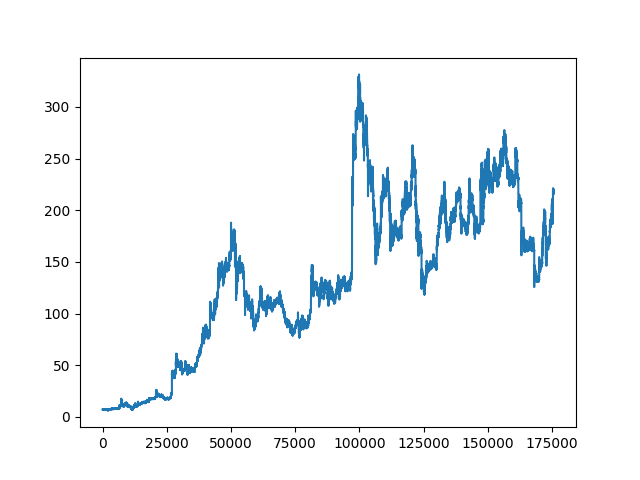

In [146]:
%matplotlib notebook
plt.plot(dollar['tick_num'], dollar['close'])


In [147]:
from mlfinlab.data_structures import imbalance_data_structures


# Dollar Bars

#dollar = standard_data_structures.get_dollar_bars('NVAX_test.csv', threshold=700,
#batch_size=1000000, verbose=True)

[one, volume_imbalance] = imbalance_data_structures.get_const_volume_imbalance_bars('NVAX_test.csv',
exp_num_ticks_init=100000)

Reading data in batches:
Batch number: 0


c:\program files\python38\lib\site-packages\mlfinlab-0.10.0-py3.8.egg\mlfinlab\data_structures\base_bars.py:387: RuntimeWarning: invalid value encountered in greater
  if np.abs(self.thresholds['cum_theta']) > self.thresholds['exp_num_ticks'] * np.abs(


Returning bars 



In [148]:
volume_imbalance.head(4)

""


In [149]:
%matplotlib notebook
plt.plot(volume_imbalance['tick_num'], volume_imbalance['close'])

KeyError: 'tick_num'

In [150]:
df['Close'].head(5)

0    7.1896
1    7.1099
2    7.0300
3    6.9400
4    7.0400
Name: Close, dtype: float64

In [151]:
from mlfinlab.filters import cusum_filter
cusum_events = cusum_filter(df['Close'], threshold=0.05, time_stamps = False)

In [152]:
#print(cusum_events)

In [153]:
events_df = df.filter(items = cusum_events, axis = 0)

print(events_df.head(5))

               datetime  Open    High     Low   Close  Volume
81  2020-01-31 18:51:00  6.86  6.8600  6.8199  6.8300   18110
221 2020-01-31 21:12:00  7.14  7.1573  7.1353  7.1555    8744
292 2020-01-31 22:23:00  7.45  7.4900  7.4450  7.4800   35301
389 2020-02-03 17:30:00  7.26  7.3000  7.2000  7.2500  215286
509 2020-02-03 19:30:00  7.05  7.0501  7.0000  7.0200   78677


In [154]:
from mlfinlab.filters import z_score_filter
z_score_events = z_score_filter(df['Close'], mean_window=100, std_window=100, z_score=2.5,
                                time_stamps = False)

In [155]:
events_df = df.filter(items = z_score_events, axis = 0)

print(events_df.head(5))

               datetime    Open    High     Low  Close  Volume
202 2020-01-31 20:53:00  6.9700  6.9800  6.9662  6.980    4898
203 2020-01-31 20:54:00  6.9704  7.0500  6.9704  7.030   47852
204 2020-01-31 20:55:00  7.0350  7.0784  7.0350  7.070   13693
205 2020-01-31 20:56:00  7.0700  7.0708  7.0484  7.068   12740
206 2020-01-31 20:57:00  7.0400  7.0900  7.0400  7.090    2882


In [156]:
df = df.set_index(['datetime'])

In [157]:
print(df['Close'].head(4))

datetime
2020-01-31 17:30:00    7.1896
2020-01-31 17:31:00    7.1099
2020-01-31 17:32:00    7.0300
2020-01-31 17:33:00    6.9400
Name: Close, dtype: float64


In [158]:
import mlfinlab as ml

# Compute daily volatility

daily_vol = ml.util.get_daily_vol(df['Close'], lookback=50)

# Apply Symmetric CUSUM Filter and get timestamps for events
# Note: Only the CUSUM filter needs a point estimate for volatility

cusum_events = ml.filters.cusum_filter(df['Close'],
                                       threshold=daily_vol[:].mean()*0.5)

# Compute vertical barrier

vertical_barriers = ml.labeling.add_vertical_barrier(t_events=cusum_events,
close=df['Close'], num_days=1)

In [159]:
pt_sl = [1, 2]
min_ret = 0.005
triple_barrier_events = ml.labeling.get_events(df['Close'],
t_events=cusum_events,
pt_sl=pt_sl,
target=daily_vol,
min_ret=min_ret,
num_threads=3,
vertical_barrier_times=vertical_barriers)

2021-12-23 15:20:35.816206 100.0% apply_pt_sl_on_t1 done after 0.25 minutes. Remaining 0.0 minutes.


<IPython.core.display.Javascript object>


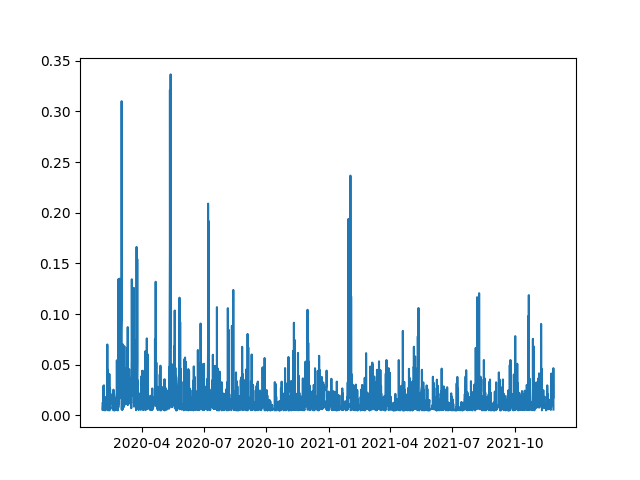

In [95]:
%matplotlib notebook
plt.plot(triple_barrier_events.index, triple_barrier_events['trgt'])

In [96]:
## https://ai.plainenglish.io/start-using-better-labels-for-financial-machine-learning-6eeac691e660

In [97]:
from mlfinlab.sampling.concurrent import get_av_uniqueness_from_triple_barrier

#barrier_events = pd.read_csv('NVAX_test.csv', index_col=0, parse_dates=[0,2])

#close_prices = pd.read_csv('NVAX_test.csv', index_col=0, parse_dates=[0,2])

av_unique = get_av_uniqueness_from_triple_barrier(triple_barrier_events, df['Close'],
num_threads=3)

2021-12-23 15:11:45.872442 100.0% num_concurrent_events done after 0.11 minutes. Remaining 0.0 minutes..
2021-12-23 15:11:52.012483 100.0% _get_average_uniqueness done after 0.1 minutes. Remaining 0.0 minutes.s.


In [98]:
av_unique.head(5)

,tW
2020-02-03 17:31:00,0.592593
2020-02-03 17:33:00,0.476190
2020-02-03 17:39:00,0.708333
2020-02-03 17:42:00,0.750000
2020-02-03 17:45:00,0.666667


In [99]:
stock = 'NVAX'
df = pd.read_csv(r'C:\Users\Michael\Desktop\Python\Stonks\Data_Scrape\file_storage_new\NVAX.csv'
                 , parse_dates = [['<DATE>', '<TIME>']])

df.drop(['Unnamed: 0'], axis=1, inplace = True)


df.columns = ['datetime','Open','High','Low','Close','Volume']

In [100]:
df.head(5)

,datetime,Open,High,Low,Close,Volume
0,2020-01-31 17:30:00,7.2100,7.290,7.1500,7.1896,145419
1,2020-01-31 17:31:00,7.2050,7.205,7.0000,7.1099,57453
2,2020-01-31 17:32:00,7.0300,7.110,7.0300,7.0300,22454
3,2020-01-31 17:33:00,7.0300,7.060,6.9300,6.9400,60747
4,2020-01-31 17:34:00,6.9301,7.050,6.9301,7.0400,25353


In [101]:
df.shape

(175562, 6)

In [102]:

df_ndaq = pd.read_csv(r'C:\Users\Michael\Desktop\Python\Stonks\Data_Scrape\file_storage_new\NASDAQ100_200131_211126.txt'
                 , parse_dates = [['<DATE>', '<TIME>']])

#df.drop(['Unnamed: 0'], axis=1, inplace = True)


df_ndaq.columns = ['datetime','Open_ndaq','High_ndaq','Low_ndaq','Close_ndaq','Volume_ndaq']

In [103]:
df_ndaq.head(5)

,datetime,Open_ndaq,High_ndaq,Low_ndaq,Close_ndaq,Volume_ndaq
0,2020-01-31 00:01:00,9136.087,9136.087,9136.087,9136.087,2146163
1,2020-01-31 17:32:00,9167.006,9167.006,9167.006,9167.006,0
2,2020-01-31 17:33:00,9159.026,9159.026,9159.026,9159.026,0
3,2020-01-31 17:34:00,9139.133,9139.133,9139.133,9139.133,982949
4,2020-01-31 17:35:00,9139.322,9139.322,9139.322,9139.322,989636


In [104]:
df_ndaq.shape

(178256, 6)

In [105]:
combined_df = pd.merge(df, df_ndaq, on='datetime')

In [106]:
combined_df.head(5)

,datetime,Open,High,Low,Close,Volume,Open_ndaq,High_ndaq,Low_ndaq,Close_ndaq,Volume_ndaq
0,2020-01-31 17:32:00,7.0300,7.11,7.0300,7.0300,22454,9167.006,9167.006,9167.006,9167.006,0
1,2020-01-31 17:33:00,7.0300,7.06,6.9300,6.9400,60747,9159.026,9159.026,9159.026,9159.026,0
2,2020-01-31 17:34:00,6.9301,7.05,6.9301,7.0400,25353,9139.133,9139.133,9139.133,9139.133,982949
3,2020-01-31 17:35:00,7.0400,7.08,7.0000,7.0000,23505,9139.322,9139.322,9139.322,9139.322,989636
4,2020-01-31 17:36:00,6.9700,7.02,6.9500,7.0173,12454,9141.547,9141.547,9141.547,9141.547,751910


In [107]:
combined_df.shape

(173648, 11)

In [108]:
combined_df = combined_df.set_index(['datetime'])

In [113]:
import scipy.stats as stats

In [114]:
r, p = stats.pearsonr(combined_df['Close'], combined_df['Close_ndaq'])

print(f"Pearson r: {r} and p-value: {p}")

Pearson r: 0.860994989891818 and p-value: 0.0


In [115]:
new_df = combined_df[['Close', 'Close_ndaq']]

print(new_df.head(5))

                      Close  Close_ndaq
datetime                               
2020-01-31 17:32:00  7.0300    9167.006
2020-01-31 17:33:00  6.9400    9159.026
2020-01-31 17:34:00  7.0400    9139.133
2020-01-31 17:35:00  7.0000    9139.322
2020-01-31 17:36:00  7.0173    9141.547


<IPython.core.display.Javascript object>


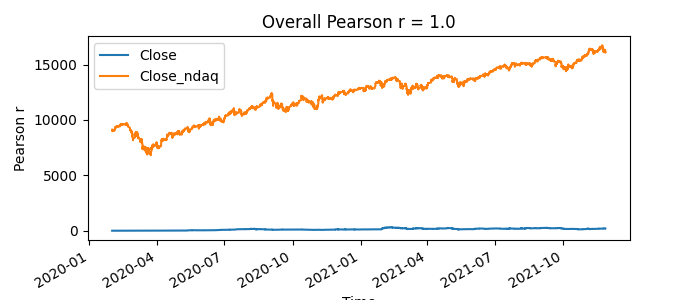

In [116]:
f,ax=plt.subplots(figsize=(7,3))

combined_df[['Close', 'Close_ndaq']].rolling(window=30,center=True).median().plot(ax=ax)

ax.set(xlabel='Time',ylabel='Pearson r')

ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

<IPython.core.display.Javascript object>


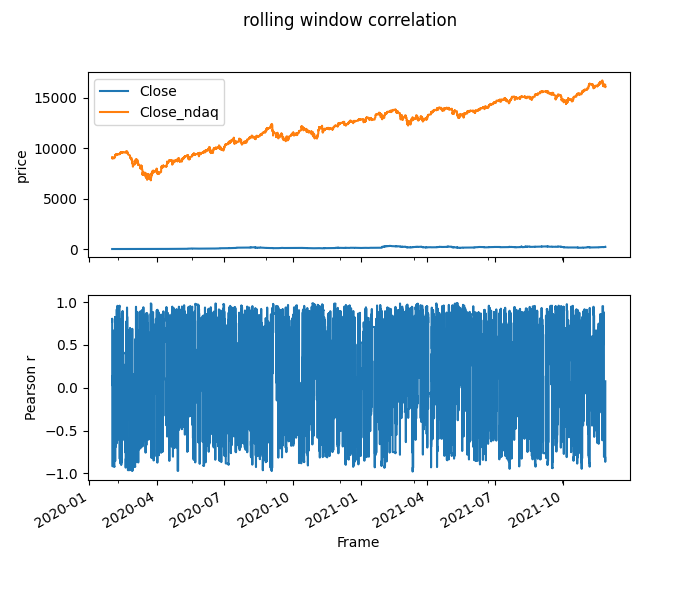

Text(0.5, 0.98, 'rolling window correlation')

In [117]:
r_window_size = 120
# Interpolate missing data.
df_interpolated = new_df.interpolate()
# Compute rolling window synchrony
rolling_r = new_df['Close'].rolling(window=r_window_size, center=True).corr(new_df['Close_ndaq'])
f,ax=plt.subplots(2,1,figsize=(7,6),sharex=True)
new_df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='price')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("rolling window correlation")

In [118]:
'''av_unique = get_av_uniqueness_from_triple_barrier(triple_barrier_events, df['Close'],
num_threads=3)'''

"av_unique = get_av_uniqueness_from_triple_barrier(triple_barrier_events, df['Close'],\nnum_threads=3)"

In [161]:
triple_barrier_events.dropna(inplace = True)



print(type(triple_barrier_events))




<class 'pandas.core.frame.DataFrame'>


In [162]:
## must have clean versions of triple_barrier_events and df['Close']
## no nan's


from mlfinlab.sample_weights import get_weights_by_return


#barrier_events = pd.read_csv('FILE_PATH', index_col=0, parse_dates=[0,2])

#close_prices = pd.read_csv('FILE_PATH', index_col=0, parse_dates=[0,2])

sample_weights = get_weights_by_return(triple_barrier_events, df['Close'])

2021-12-23 15:21:09.310709 100.0% num_concurrent_events done after 0.1 minutes. Remaining 0.0 minutes.
2021-12-23 15:21:16.077798 100.0% _apply_weight_by_return done after 0.11 minutes. Remaining 0.0 minutes.


In [164]:
sample_weights.tail(5)

2021-11-26 19:47:00    3.779767
2021-11-26 20:14:00    0.836857
2021-11-26 20:26:00    0.422201
2021-11-26 20:31:00    1.353223
2021-11-26 20:35:00    1.955440
dtype: float64

In [165]:
from mlfinlab.sample_weights import get_weights_by_time_decay


#barrier_events = pd.read_csv('FILE_PATH', index_col=0, parse_dates=[0,2])

#close_prices = pd.read_csv('FILE_PATH', index_col=0, parse_dates=[0,2])

sample_weights = get_weights_by_time_decay(triple_barrier_events, df['Close'], decay = 0.5)

2021-12-23 15:33:37.474448 100.0% num_concurrent_events done after 0.11 minutes. Remaining 0.0 minutes.
2021-12-23 15:33:43.544699 100.0% _get_average_uniqueness done after 0.09 minutes. Remaining 0.0 minutes.


In [166]:
sample_weights.head(5)

2020-02-03 17:31:00    0.500075
2020-02-03 17:33:00    0.500135
2020-02-03 17:39:00    0.500224
2020-02-03 17:42:00    0.500319
2020-02-03 17:45:00    0.500403
Name: tW, dtype: float64

In [167]:
sample_weights.tail(5)

2021-11-26 19:47:00    0.999671
2021-11-26 20:14:00    0.999765
2021-11-26 20:26:00    0.999825
2021-11-26 20:31:00    0.999880
2021-11-26 20:35:00    1.000000
Name: tW, dtype: float64

In [169]:
print(type(df['Close']))

<class 'pandas.core.series.Series'>


In [170]:
from mlfinlab.features.fracdiff import frac_diff_ffd



frac_diff_series = frac_diff_ffd(combined_df, 0.5)

In [171]:
frac_diff_series.shape

(173648, 10)

In [177]:
label_list = list(combined_df.columns)

<IPython.core.display.Javascript object>


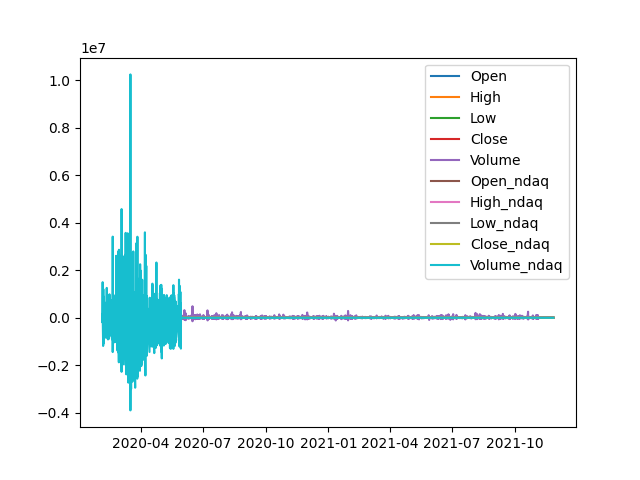

In [178]:
%matplotlib notebook

plt.plot(frac_diff_series)
plt.legend(label_list)

In [1]:
import full_export_tools_original as tools


In [2]:
tools.test_import()

I work good


In [ ]:
df.shape

In [ ]:
from fracdiff import FracdiffStat
from fracdiff import Fracdiff

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

In [ ]:
print(df.columns.to_list())

In [ ]:
test_frac_diff = df.iloc[:,:]

In [ ]:
test_frac_diff = test_frac_diff.values.reshape(-1,test_frac_diff.shape[1])

In [ ]:
f = FracdiffStat(window = 30)
frac_diff_out = f.fit_transform(test_frac_diff)


In [ ]:
#f = Fracdiff(d = d_val, window = 60)
#frac_diff_out = f.transform(test_frac_diff)

In [ ]:
df_frac = pd.DataFrame(frac_diff_out, index = df.index, columns = df.columns)

In [ ]:
df_frac.head(5)

In [ ]:
%matplotlib notebook
plt.plot(df_frac['Close'])
plt.plot(adj_close_list)
plt.legend(['Close frac','true'])

In [ ]:
df.rename({"Close": "Adj Close"}, axis = 1, inplace = True)

df.head(4)

In [ ]:
'''#2 min ticker
# 30 intervals = 1 hour << OLD
# 195 intervals = trading day'''
                                            # there are more intervals that we can use / change
    
# 390 intervals / day < 1 min intervals
# 390 < 1 day, 780 < 2 day, 1170 < 3 days, 1560 < 4 day, 1950 < 5 days
# 2340 < 6 days, 2730 < 7 days, 3120 < 8 days, 3510 < 9 days,
# 3900 < 10 days, 4290 < 11 days, 4680 < 12 days, 5070 < 13 days,
# 5460 < 14 days, 5850 < 15 days, 6240 < 16 days, 6630 < 17 days,

#min tickers
#
really_fast = 5
fast = 30
slow = 120

add_indicators()

# Convert Date column to datetime
df.reset_index(level=0, inplace=True)

df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Change all column headings to be lower case, and remove spacing


In [ ]:
df.columns.to_list()

In [ ]:
df.tail(5)

In [ ]:
#print(df.columns.to_list())

In [ ]:
df_frac.rename({"Close": "Adj Close"}, axis = 1, inplace = True)

df_frac.head(5)

In [ ]:
df[['open', 'high', 'low','adj_close']] = df_frac[['Open', 'High', 'Low', 'Adj Close']].values

In [ ]:
df.tail(5)

In [ ]:
# Get difference between high and low of each day
df['range_hl'] = df['high'] - df['low']
df.drop(['high', 'low'], axis=1, inplace=True)
# Get difference between open and close of each day
df['range_oc'] = df['open'] - df['adj_close']
df.drop(['open'], axis=1, inplace=True)
# Add a column 'order_day' to indicate the order of the rows by date
df['order_day'] = [x for x in list(range(len(df)))]
# merging_keys
merging_keys = ['order_day']

In [ ]:
df.head(5)

In [ ]:
num_interval_lag = 30

df = add_lag(num_interval_lag, df)

#df['adj_close'] = df['adj_close'].shift(30)

In [ ]:
df.fillna(0, inplace=True)

#df.tail(35)

In [ ]:
df.columns.to_list()

In [ ]:
df.info(memory_usage = 'deep')

In [ ]:
types_list = df.dtypes
types_list.to_dict()

In [ ]:


df = df.select_dtypes(include = ['float64']).astype('float16', copy = False)

In [ ]:
types_list = df.dtypes
types_list.to_dict()

In [ ]:
df['datetime'] = df_frac.index

In [ ]:
df.info(memory_usage = 'deep')

In [ ]:
df.tail(5)

In [ ]:
'''7020	18
7410	19
7800	20
8190	21
8580	22
8970	23
9360	24
9750	25
10140	26
10530	27
10920	28
11310	29
11700	30
12090	31
12480	32
12870	33
13260	34
13650	35
14040	36
14430	37
14820	38
15210	39
15600	40
15990	41
16380	42
16770	43
17160	44
17550	45
17940	46
18330	47
18720	48
19110	49
19500	50
19890	51
20280	52
20670	53
21060	54
21450	55
21840	56
22230	57
22620	58
23010	59
23400	60
23790	61
24180	62
24570	63
24960	64
25350	65
25740	66
26130	67
26520	68
26910	69
27300	70
27690	71
28080	72
28470	73
28860	74
29250	75
29640	76
30030	77
30420	78
30810	79
31200	80
31590	81
31980	82
32370	83
32760	84
33150	85
33540	86
33930	87
34320	88
34710	89
35100	90'''


In [ ]:
#add_labels(df)


# 390 intervals / day < 1 min intervals
# 390 < 1 day, 780 < 2 day, 1170 < 3 days, 1560 < 4 day, 1950 < 5 days
# 2340 < 6 days, 2730 < 7 days, 3120 < 8 days, 3510 < 9 days,
# 3900 < 10 days, 4290 < 11 days, 4680 < 12 days, 5070 < 13 days,
# 5460 < 14 days, 5850 < 15 days, 6240 < 16 days, 6630 < 17 days,

window_size = 15
add_labels(df, window_size)


#print(df['labels'])

In [ ]:
df.tail(5)

In [ ]:
buy_true_markers = df.index[df['labels']==1].tolist()
sell_true_markers = df.index[df['labels']==0].tolist()
#BUY => 1, SELL => 0, HOLD => 2
all_markers = df['labels']

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(df['datetime'], adj_close_list)
plt.plot(df['datetime'], adj_close_list, 'g^', markevery = buy_true_markers)
plt.plot(df['datetime'], adj_close_list, 'rv', markevery = sell_true_markers)

In [ ]:
%matplotlib notebook

plt.plot(df['datetime'], adj_close_list)
plt.plot(df['datetime'], df['upper_band_nine'], 'r:')
plt.plot(df['datetime'], df['lower_band_nine'], 'g:')
plt.plot(df['datetime'], adj_close_list, 'g^', markevery = buy_true_markers)
plt.plot(df['datetime'], adj_close_list, 'rv', markevery = sell_true_markers)

In [ ]:
df.head(5)

In [ ]:
label_vals = df['labels'].value_counts()
df['labels'].value_counts()
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
num_buys = label_vals[1]
num_sells = label_vals[0]
num_holds = label_vals[2]

In [ ]:
least_vals = min(num_buys, num_sells, num_holds)
#print(least_vals)

In [ ]:
imp_factor = 5


In [ ]:
weight_buys = imp_factor * (least_vals / num_buys)
weight_sells = imp_factor * (least_vals / num_sells)
weight_holds = least_vals / num_holds
print(weight_buys)
print(weight_sells)
print(weight_holds)
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
buy_list = df.index[df['labels'] == 1].tolist()
sell_list = df.index[df['labels'] == 0].tolist()
hold_list = df.index[df['labels'] == 2].tolist()

In [ ]:
df.loc[buy_list, 'weights'] = weight_buys
df.loc[sell_list, 'weights'] = weight_sells
df.loc[hold_list, 'weights'] = weight_holds

In [ ]:
#df['weights'].tail(50)

In [ ]:
cols_to_rem = ['weights','adj_close','ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc', 'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line', 'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star','dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows','in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star','on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar','three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                'mid_band','d_ema','ht_trend','kama','ma_fast','ma_really_fast','ma_slow','mid','mid_price','sar','sarext','sma','tema','trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd','macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix','ult_osc', 'atr','natr','t_range',
                'upper_band_nine','lower_band_nine','mid_band_nine','upper_band_one','lower_band_one','mid_band_one','upper_band_slow','lower_band_slow','mid_band_slow' 
                ]

In [ ]:
close_vals_list = df['adj_close']
dates_list = df['datetime']
weights_list = df['weights']

In [ ]:
df.head(1)

In [ ]:
print(df.columns.to_list())

In [ ]:
df.shape

In [ ]:
df.drop(cols_to_rem, axis = 1, inplace = True, errors = 'ignore')

In [ ]:
all_cols = df.columns.tolist()

In [ ]:
df.head(1)

In [ ]:
print(df.shape)

In [ ]:
#print(weights_list)

In [ ]:


#BUY => 1, SELL => 0, HOLD => 2

num_test = int(.2*len(df))
num_train = len(df) - num_test


print(df['labels'].iloc[[-1]])

#train_close_vals = close_vals_list[:num_train]
#test_close_vals = close_vals_list[num_train:]

#test_dates_list = test['date']
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
df['labels'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cols_to_scale = add_scale(num_interval_lag)

#cols_to_scale.remove(cols_to_rem)

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak


In [ ]:
for element in cols_to_rem:

    if element in cols_to_scale:

        cols_to_scale.remove(element)

In [ ]:
len(cols_to_scale)

In [ ]:
df = df[slow:]
weights_list = weights_list[slow:]

close_vals_list = close_vals_list[slow:]

In [ ]:
all_X = df[cols_to_scale]
all_y = df['labels']

In [ ]:
all_X.head(5)


In [ ]:
all_X.columns.to_list()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.2, shuffle = False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = False) # 0.25 x 0.8 = 0.2

#scaling test dataset

#X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(all_X_scaled, all_y, test_size=0.2, shuffle = False)

#X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, shuffle = False)

In [ ]:
X_test.head(5)

In [ ]:
test_set_len = len(y_test)
print(test_set_len)

In [ ]:
test_dates_list = dates_list[-test_set_len:]

test_vals_list = close_vals_list[-test_set_len:]

test_labels = all_markers[-test_set_len:]

In [ ]:

buy_true_test_markers = test_labels.values == 1
sell_true_test_markers = test_labels.values == 0


In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(test_dates_list, test_vals_list)
plt.plot(test_dates_list, test_vals_list, 'g^', markevery=buy_true_test_markers)
plt.plot(test_dates_list, test_vals_list, 'rv', markevery=sell_true_test_markers)

In [ ]:
train_len = len(X_train)
val_len = len(X_val)
test_len = len(X_test)
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
train_weights = weights_list[:train_len]
val_weights = weights_list[train_len:train_len + val_len]
test_weights = weights_list[train_len + val_len:]

In [ ]:
#test_weights

In [ ]:
y_test.value_counts()
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
d_train = xgb.DMatrix(X_train, label = y_train, weight = train_weights)
d_val = xgb.DMatrix(X_val, label = y_val, weight = val_weights)
d_test = xgb.DMatrix(X_test, label = y_test, weight = test_weights)

In [ ]:
#val_frame = pd.DataFrame(val_weights)
#BUY => 1, SELL => 0, HOLD => 2
y_val.value_counts()

In [ ]:
#%reset

In [ ]:
import yfinance as yf
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np
import pickle
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
yf.pdr_override()

In [ ]:
from sklearn.metrics import recall_score
from typing import Tuple

def recall(predt: np.ndarray, dtrain: xgb.DMatrix) -> Tuple[str, float]:
    ''' Root mean squared log error metric.'''
    y = dtrain.get_label()
    
    inter_vals = pd.DataFrame(y)
    vals_all = inter_vals.value_counts()
    
    #BUY => 1, SELL => 0, HOLD => 2
    
    #print(predt)
    
    inter_num_buys = vals_all[1]
    inter_num_sells = vals_all[0]
    inter_num_holds = vals_all[2]
    
    least_vals = min(inter_num_buys, inter_num_sells, inter_num_holds)
    
    imp_factor = 5
    
    inter_weight_buys = imp_factor * (least_vals / inter_num_buys)
    inter_weight_sells = imp_factor * (least_vals / inter_num_sells)
    inter_weight_holds = least_vals / inter_num_holds
    
    
    #print(inter_weight_buys)
    #print(inter_weight_sells)
    #print(inter_weight_holds)
    
    #predt[predt < -1] = -1 + 1e-6

    #print(len(predt))
    #print(predt.shape)
    
    y_pred = [None] * len(predt)
    inter_weights = [None] * len(predt)
    
    for x in range(len(predt)):
        
        val_0 = predt[x,0]
        val_1 = predt[x,1]
        val_2 = predt[x,2]
        
        pos = max(val_0, val_1, val_2)
        
        if pos == val_0:
            y_pred[x] = 0
            inter_weights[x] = inter_weight_sells
        elif pos == val_1:
            y_pred[x] = 1
            inter_weights[x] = inter_weight_buys
        elif pos == val_2:
            y_pred[x] = 2
            inter_weights[x] = inter_weight_holds
            
    #breakpoint
    #print(y_pred)
    #BUY => 1, SELL => 0, HOLD => 2
    
    rec_return_sell = recall_score(y, y_pred, labels = [0], average = 'weighted', sample_weight = inter_weights)
    rec_return_buy = recall_score(y, y_pred, labels = [1], average = 'weighted', sample_weight = inter_weights)

    
    #rec_return = (rec_return_sell + rec_return_buy) / 2
    #prec_return = (prec_return_sell + prec_return_buy) / 2
    
    #print(rec_return_sell)
    #print(rec_return_buy)
    
    rec_mult = rec_return_sell * rec_return_buy
    
    return [('adj_recall', float(rec_mult))]

In [ ]:
d_train = xgb.DMatrix('d_train')
d_val = xgb.DMatrix('d_val')
d_test = xgb.DMatrix('d_test')

In [ ]:
eval_set = [(d_train, 'train'), (d_val, 'val')]


In [ ]:
'''xgb.DMatrix.save_binary(d_train, 'd_train')
xgb.DMatrix.save_binary(d_val, 'd_val')
xgb.DMatrix.save_binary(d_test, 'd_test')'''


In [ ]:

evals_result = {}

params = {'tree_method': 'gpu_hist',
            'gpu_id': 0,
            'disable_default_eval_metric':True,
            'max_depth':29,
            'learning_rate':0.5,
            #'eval_metric': ['merror','mlogloss'],
            'objective': 'multi:softprob',
            'min_child_weight':0.5,
            'subsample':1,
            'num_class': 3,
            'gamma':0.1,
            'verbosity': 2}

In [ ]:
whos

In [ ]:
#num_round = 1000
bst = xgb.train(params,
                d_train,
                num_boost_round = 100,
                feval = recall,
                evals = eval_set,
                maximize = True,
                evals_result = evals_result,
                early_stopping_rounds = 10)

In [ ]:
epochs = len(evals_result['val']['adj_recall'])
x_axis = range(0, epochs)


plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['adj_recall'], label='Train')
ax.plot(x_axis, evals_result['val']['adj_recall'], label='Val')
ax.legend()
plt.ylabel('adj_recall')
plt.xlabel('n_estimators')
plt.title('XGBoost adj_recall')

In [ ]:
how_many = bst.best_ntree_limit
print(how_many)

In [ ]:
bst.best_iteration

#how_many = 5

In [ ]:
bst = xgb.train(params,
                d_train,
                num_boost_round = how_many,
                feval = recall,
                maximize = True,
                evals = eval_set,
                evals_result = evals_result)

In [ ]:
preds = bst.predict(d_test)

In [ ]:
preds_df = pd.DataFrame(preds)

preds_df.value_counts()

In [ ]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
best_preds

In [ ]:
pred_df = pd.DataFrame(best_preds)

In [ ]:
pred_df.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
epochs = len(evals_result['val']['adj_recall'])
x_axis = range(0, epochs)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['adj_recall'], label='Train')
ax.plot(x_axis, evals_result['val']['adj_recall'], label='Val')
ax.legend()
plt.ylabel('adj_recall')
plt.xlabel('n_estimators')
plt.title('XGBoost adj_recall')

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
xgb.plot_importance(bst, max_num_features = 50)
plt.rcParams['figure.figsize'] = [10, 6]
xgb.plot_tree(bst)



In [ ]:
feature_important = bst.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

In [ ]:
feature_dict = dict(zip(keys, values))

In [ ]:
my_keys = sorted(feature_dict, key=feature_dict.get, reverse=True)[:29]

In [ ]:
my_keys.append('labels')

In [ ]:
print(my_keys)

In [ ]:
analyze_df = df[my_keys]

In [ ]:
analyze_df.to_csv(r'C:\Users\Michael\Desktop\Python\Stonks\Data_Scrape\file_storage\analyze.csv')

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
dft = AV.AutoViz(r'C:\Users\Michael\Desktop\Python\Stonks\Data_Scrape\file_storage\analyze.csv',
                 sep=',', depVar='labels', dfte=analyze_df, header=0, verbose=2,
                            lowess=False,chart_format='png',max_rows_analyzed=30000,max_cols_analyzed=30)
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
y_test.value_counts()
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
pred_df.value_counts()
#BUY => 1, SELL => 0, HOLD => 2

In [ ]:
from imblearn.metrics import classification_report_imbalanced
target_names = ['Sell', 'Buy', 'Hold']
print(classification_report_imbalanced(y_test.values, pred_df.values, target_names=target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test.values.tolist(), pred_df.values.tolist())
conf_mat_norm = confusion_matrix(y_test.values.tolist(), pred_df.values.tolist(), normalize = 'true')
print(conf_mat)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_mat_norm, display_labels = target_names)
disp.plot()

In [ ]:
print(pred_df.values[-1])
#last class label
#plt.ylabel('BUY => 1, SELL => 0, HOLD => 2')
test_dates_list[-1:]

In [ ]:
buy_list_markers = pred_df.index[pred_df[0]==1].tolist()
sell_list_markers = pred_df.index[pred_df[0]==0].tolist()

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.subplot(2,1,1)

plt.plot(test_dates_list, adj_close_list[-len(test_vals_list):])
plt.plot(test_dates_list, adj_close_list[-len(test_vals_list):], 'g^', markevery=buy_list_markers)
plt.plot(test_dates_list, adj_close_list[-len(test_vals_list):], 'rv', markevery=sell_list_markers)

plt.subplot(2,1,2)

plt.plot(test_dates_list, adj_close_list[-len(test_vals_list):])
plt.plot(test_dates_list, adj_close_list[-len(test_vals_list):], 'g^', markevery=buy_true_test_markers)
plt.plot(test_dates_list, adj_close_list[-len(test_vals_list):], 'rv', markevery=sell_true_test_markers)

#plt.show()

In [ ]:
df_reg = df

In [ ]:
df_reg.shape

In [ ]:
df_reg['adj_close'] = close_vals_list

In [ ]:
df_reg['adj_close'] = df_reg['adj_close'].shift(30)

In [ ]:
df_reg = df_reg.tail(-30)

In [ ]:
df_reg.shape

In [ ]:
df_reg.drop(['labels'], axis = 1, inplace = True)

In [ ]:
df_reg.shape

In [ ]:
df_reg['adj_close']

In [ ]:
all_X_reg = df_reg[cols_to_scale]
all_y_reg = df_reg['adj_close']

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(all_X_reg, all_y_reg, 
                                                                    test_size=0.2, shuffle = False)

X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg,
                                                                  test_size=0.25, shuffle = False) # 0.25 x 0.8 = 0.2

In [ ]:
d_train_reg = xgb.DMatrix(X_train_reg, label = y_train_reg)
d_val_reg = xgb.DMatrix(X_val_reg, label = y_val_reg)
d_test_reg = xgb.DMatrix(X_test_reg, label = y_test_reg)

eval_set_reg = [(d_train_reg, 'train'), (d_val_reg, 'val')]

evals_result_reg = {}

In [ ]:
params = {'tree_method': 'gpu_hist',
            'gpu_id': 0,
            'n_estimators': 500,
            'max_depth':25,
            'learning_rate':0.1,
            'eval_metric': 'mae',
            'objective': 'reg:gamma',
            'min_child_weight':0.25,
            'subsample':1,
            'gamma':0.05,
            'verbosity': 2}

In [ ]:
bst = xgb.train(params,
                d_train_reg,
                num_boost_round = 1000,
                evals = eval_set_reg,
                evals_result = evals_result_reg,
                early_stopping_rounds = 50)

In [ ]:
epochs = len(evals_result_reg['val']['mae'])
x_axis = range(0, epochs)


plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result_reg['train']['mae'], label='Train')
ax.plot(x_axis, evals_result_reg['val']['mae'], label='Val')

ax.legend()
plt.ylabel('errors')
plt.xlabel('n_estimators')
plt.title('XGBoost errors')

In [ ]:
preds = bst.predict(d_test_reg)

In [ ]:
print(len(preds))

In [ ]:
%matplotlib notebook

plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list[6:], y_test_reg)


plt.plot(test_dates_list[6:], preds)

plt.legend(['true','pred'])
